In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import os

## Análise Exploratória - EDA Inicial

In [2]:
# Mostrar todas as colunas
pd.set_option('display.max_columns', None)

# Mostrar todas as linhas
pd.set_option('display.max_rows', None)

# Ajustar largura máxima (sem cortar colunas grandes)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
"""
Fonte Dados
https://opendatasus.saude.gov.br/lt/dataset/arboviroses-dengue/resource/5c9132a9-77c2-4b15-8afc-a43c58fc9ec0?inner_span=True


Dicionario de Dados
https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SINAN/Dengue/dic_dados_dengue.pdf
https://portalsinan.saude.gov.br/images/documentos/Agravos/Dengue/DIC_DADOS_ONLINE.pdf

Referencia para dengue com sinais de almarme, dengue grave
https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/entenda-o-que-e-a-dengue-grave-e-como-e-o-tratamento#:~:text=Tamb%C3%A9m%20conhecida%20como%20dengue%20com,pode%20inclusive%20levar%20a%20%C3%B3bito.


"""

'\nFonte Dados\nhttps://opendatasus.saude.gov.br/lt/dataset/arboviroses-dengue/resource/5c9132a9-77c2-4b15-8afc-a43c58fc9ec0?inner_span=True\n\n\nDicionario de Dados\nhttps://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SINAN/Dengue/dic_dados_dengue.pdf\nhttps://portalsinan.saude.gov.br/images/documentos/Agravos/Dengue/DIC_DADOS_ONLINE.pdf\n\nReferencia para dengue com sinais de almarme, dengue grave\nhttps://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/entenda-o-que-e-a-dengue-grave-e-como-e-o-tratamento#:~:text=Tamb%C3%A9m%20conhecida%20como%20dengue%20com,pode%20inclusive%20levar%20a%20%C3%B3bito.\n\n\n'

In [4]:

"""
Dados brutos convertidos em parquet para melhor compactação e uso
"""
ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
file_path = os.path.join(ROOT, "dataset", "DENGBR25.parquet")

In [5]:
df = pd.read_parquet(file_path)

In [6]:
# Estrutura geral do dataset
print("Formato do dataset:", df.shape)
print("\nPrimeiras linhas:")
df.head()

Formato do dataset: (1502259, 121)

Primeiras linhas:


,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_CHIK_S1,DT_CHIK_S2,DT_PRNT,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,CLASSI_FIN,CRITERIO,DOENCA_TRA,CLINC_CHIK,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_ABDOM,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ,DT_ALRM,GRAV_PULSO,GRAV_CONV,GRAV_ENCH,GRAV_INSUF,GRAV_TAQUI,GRAV_EXTRE,GRAV_HIPOT,GRAV_HEMAT,GRAV_MELEN,GRAV_METRO,GRAV_SANG,GRAV_AST,GRAV_MIOC,GRAV_CONSC,GRAV_ORGAO,DT_GRAV,MANI_HEMOR,EPISTAXE,GENGIVO,METRO,PETEQUIAS,HEMATURA,SANGRAM,LACO_N,PLASMATICO,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,CS_FLXRET,FLXRECEBI,MIGRADO_W
0,2,A90,2025-01-06,202502,2025,12,120020,1941.0,2000202.0,2025-01-01,202501,1965.0,4059,F,5.0,4.0,NaN,12,120020.0,1941.0,1,2025-01-06,nan,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,None,None,None,NaN,NaN,NaN,2025-01-06,1.0,None,NaN,None,NaN,None,NaN,NaN,NaN,NaN,2.0,None,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,NaN,NaN,1.0,None,2025-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2025-01-08,0,NaN,NaN
1,2,A90,2025-01-13,202503,2025,12,120020,1941.0,2002914.0,2025-01-11,202502,1988.0,4036,M,6.0,4.0,8.0,12,120020.0,1941.0,1,2025-01-13,nan,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,NaN,2025-01-13,1.0,1.0,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,NaN,NaN,1.0,None,2025-01-29,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2025-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2025-01-15,0,NaN,NaN
2,2,A90,2025-02-19,202508,2025,12,120020,1941.0,2000202.0,2025-02-14,202507,1994.0,4030,F,5.0,4.0,NaN,12,120020.0,1941.0,1,2025-02-19,nan,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,None,None,None,NaN,NaN,NaN,None,1.0,None,NaN,None,NaN,None,NaN,NaN,NaN,NaN,2.0,None,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,NaN,NaN,1.0,None,2025-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2025-05-05,0,NaN,NaN
3,2,A90,2025-02-28,202509,2025,12,120020,1941.0,2000202.0,2025-02-22,202508,1997.0,4028,M,6.0,4.0,NaN,12,120020.0,1941.0,1,2025-02-28,nan,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,NaN,NaN,2.0,None,NaN,NaN,NaN,NaN,NaN,NaN,8.0,3.0,NaN,NaN,NaN,None,2025-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2025-05-21,0,NaN,NaN
4,2,A90,2025-01-21,202504,2025,12,120033,1941.0,7936028.0,2025-01-19,202504,1993.0,4031,M,6.0,4.0,NaN,12,120033.0,1941.0,1,2025-01-21,nan,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,None,None,None,NaN,NaN,NaN,None,NaN,2025-01-21,1.0,None,NaN,None,NaN,NaN,NaN,NaN,2.0,None,NaN,NaN,1.0,12.0,1.0,120033.0,10.0,1.0,NaN,NaN,1.0,None,2025-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2025-03-26,0,NaN,NaN


In [7]:
"""
É possível observar já na análise inicial variáveis com valores constantes e outras com grande proporção de ausentes.
Nos sintomas clínicos o preenchimento é consistente, quase todos os pacientes têm registros e pouquíssimos valores nulos.

"""

print("\nEstatísticas descritivas")
display(df.describe().T)


Estatísticas descritivas


,count,mean,std,min,25%,50%,75%,max
TP_NOT,1502259.0,2.000000e+00,0.000000e+00,2.0,2.0,2.0,2.0,2.0
SEM_NOT,1502259.0,2.025133e+05,6.118002e+00,202501.0,202509.0,202513.0,202518.0,202527.0
NU_ANO,1502259.0,2.024999e+03,3.838751e-02,2024.0,2025.0,2025.0,2025.0,2025.0
SG_UF_NOT,1502259.0,3.620580e+01,6.935017e+00,11.0,35.0,35.0,35.0,53.0
ID_MUNICIP,1502259.0,3.645773e+05,6.895236e+04,110001.0,350560.0,353650.0,355660.0,530010.0
ID_REGIONA,1458812.0,1.455183e+03,3.722190e+02,1331.0,1342.0,1354.0,1462.0,6256.0
ID_UNIDADE,1502138.0,4.076160e+06,2.602755e+06,17.0,2085690.0,2745771.0,6580378.0,9999949.0
SEM_PRI,1502259.0,2.025127e+05,6.077202e+00,202501.0,202508.0,202513.0,202517.0,202527.0
ANO_NASC,1498018.0,1.987631e+03,2.010797e+01,1900.0,1973.0,1989.0,2003.0,2981.0
NU_IDADE_N,1502259.0,4.026047e+03,1.294818e+02,6.0,4021.0,4035.0,4051.0,4407.0


In [8]:
# Valores ausentes

"""
Diversos grupos de variáveis praticamente não preenchida.

"""
print("\nValores nulos por coluna:")
df.isnull().sum().sort_values(ascending=False)


Valores nulos por coluna:


CON_FHD       1502259
PLAQ_MENOR    1502259
EVIDENCIA     1502259
PLASMATICO    1502259
METRO         1502259
PETEQUIAS     1502259
HEMATURA      1502259
COMPLICA      1502259
DOENCA_TRA    1502259
SANGRAM       1502259
MANI_HEMOR    1502259
GENGIVO       1502259
LACO_N        1502259
EPISTAXE      1502259
MIGRADO_W     1502259
FLXRECEBI     1502256
DT_CHIK_S2    1502255
DT_PRNT       1501970
DT_CHIK_S1    1501294
NDUPLIC_N     1500452
DT_OBITO      1499989
DT_GRAV       1499765
GRAV_AST      1499575
GRAV_ORGAO    1499574
GRAV_MIOC     1499571
GRAV_SANG     1499570
GRAV_EXTRE    1499568
GRAV_METRO    1499567
GRAV_INSUF    1499565
GRAV_MELEN    1499565
GRAV_CONV     1499564
GRAV_ENCH     1499564
GRAV_CONSC    1499564
GRAV_HIPOT    1499563
GRAV_HEMAT    1499561
GRAV_TAQUI    1499560
GRAV_PULSO    1499552
RES_CHIKS2    1499531
RESUL_PRNT    1499329
RES_CHIKS1    1499269
CLINC_CHIK    1497900
DT_VIRAL      1492988
DT_ALRM       1469042
ALRM_HEPAT    1468463
ALRM_LIQ      1468460
ALRM_HEMAT

In [9]:
"""
Montando um mapeamento de acordo com o dicionario de dados para avaliara distribuição da variável target selecionada.
"""

map_classi_fin = {
    10: 0,   # Dengue comum
    11: 1,   # Dengue com sinais de alarme
    12: 1,   # Dengue grave
    8: None, # Inconclusivo -> descartar
    13: None # Chikungunya -> descartar
}
df["target"] = df["CLASSI_FIN"].map(map_classi_fin)

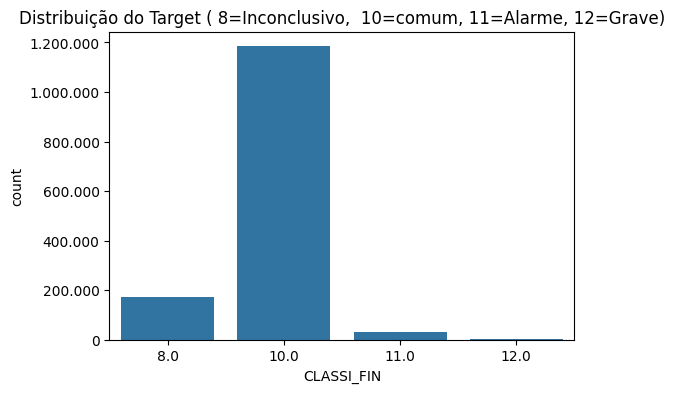

In [10]:
# Distribuição da variável target que sera agrupada em Comum e Grave
plt.figure(figsize=(6,4))
sns.countplot(x='CLASSI_FIN', data=df)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))
plt.title("Distribuição do Target ( 8=Inconclusivo,  10=comum, 11=Alarme, 12=Grave)")
plt.show()

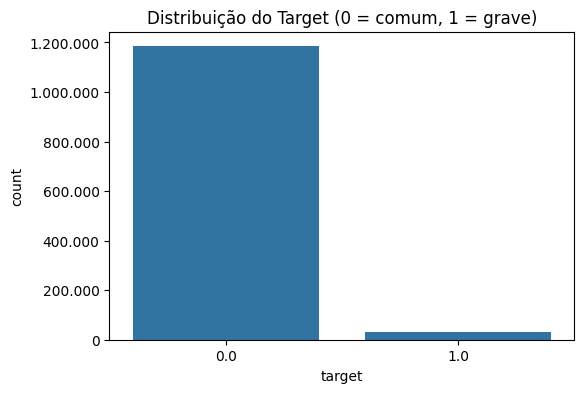

In [11]:
#Agrupando para a variavel Target
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))
plt.title("Distribuição do Target (0 = comum, 1 = grave)")
plt.show()

In [12]:
df['target'].value_counts(dropna=False)

target
0.0    1184070
NaN     286148
1.0      32041
Name: count, dtype: int64

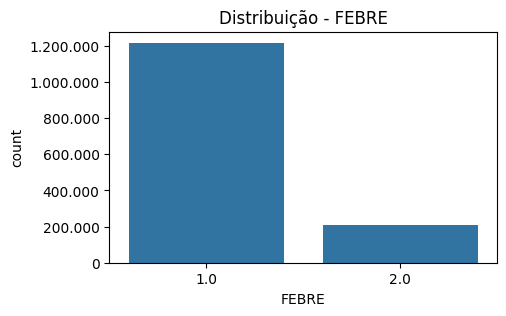

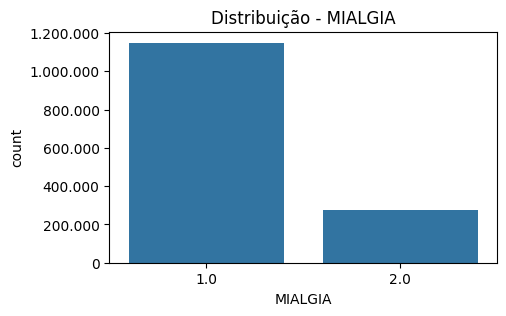

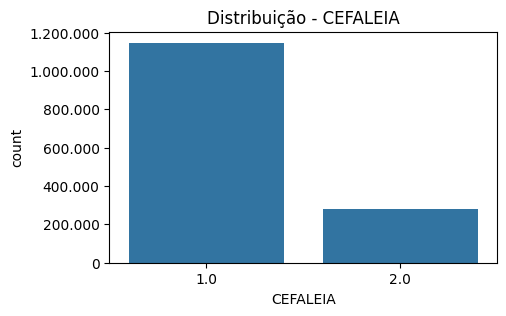

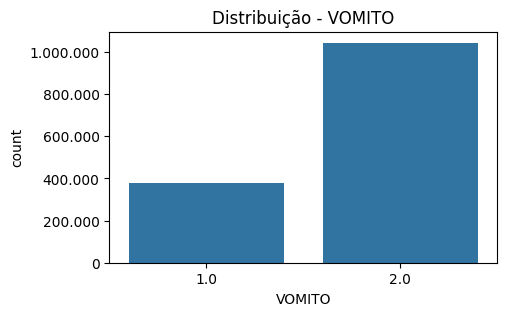

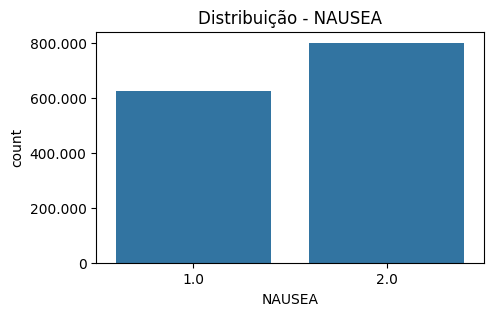

In [13]:
# 5. Distribuição de alguns sintomas principais
sintomas = ['FEBRE', 'MIALGIA', 'CEFALEIA', 'VOMITO', 'NAUSEA']
for col in sintomas:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=df)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))
    plt.title(f"Distribuição - {col.upper()}")
    plt.show()

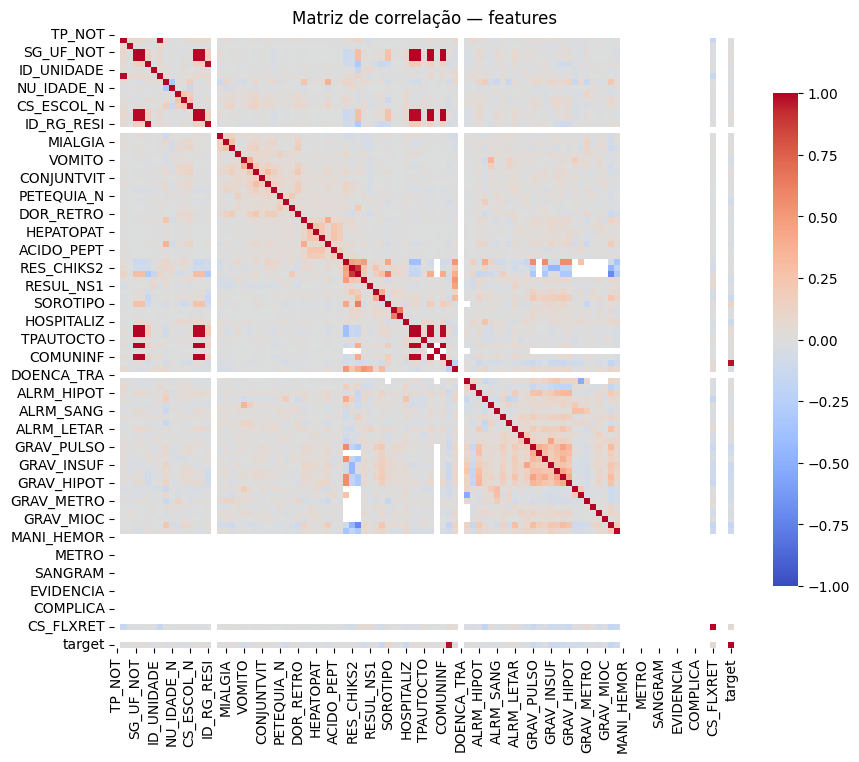

In [14]:
# Correlação
df_num = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,8))
corr = df_num.corr()
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.title("Matriz de correlação — features")
plt.show()

## EDA Focado nas Features Escolhidas
- Selecionado os Sinais clínicos, Doenças préexistentes, alguns demográficos

In [15]:
df_feature = df[['NU_IDADE_N','CS_SEXO','CS_GESTANT',
    'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA',
    'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N',
    'LEUCOPENIA', 'LACO', 'DOR_RETRO',
    'DIABETES', 'HEMATOLOG','HEPATOPAT','RENAL','HIPERTENSA',
    'ACIDO_PEPT','AUTO_IMUNE',
    'DT_NOTIFIC','DT_SIN_PRI',
    'CLASSI_FIN']].copy()

In [16]:
# Estrutura geral do dataset
print("Formato do dataset:", df_feature.shape)
print("\nPrimeiras linhas:")
df_feature.head()

Formato do dataset: (1502259, 27)

Primeiras linhas:


,NU_IDADE_N,CS_SEXO,CS_GESTANT,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_NOTIFIC,DT_SIN_PRI,CLASSI_FIN
0,4059,F,5.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2025-01-06,2025-01-01,10.0
1,4036,M,6.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2025-01-13,2025-01-11,10.0
2,4030,F,5.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2025-02-19,2025-02-14,10.0
3,4028,M,6.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2025-02-28,2025-02-22,8.0
4,4031,M,6.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2025-01-21,2025-01-19,10.0


In [17]:
print("\nEstatísticas descritivas")
display(df_feature.describe().T)


Estatísticas descritivas


,count,mean,std,min,25%,50%,75%,max
NU_IDADE_N,1502259.0,4026.047305,129.481783,6.0,4021.0,4035.0,4051.0,4407.0
CS_GESTANT,1502124.0,5.793678,1.029431,1.0,5.0,6.0,6.0,9.0
FEBRE,1425840.0,1.146587,0.353694,1.0,1.0,1.0,1.0,2.0
MIALGIA,1425840.0,1.193957,0.395395,1.0,1.0,1.0,1.0,2.0
CEFALEIA,1425840.0,1.195204,0.396357,1.0,1.0,1.0,1.0,2.0
EXANTEMA,1425840.0,1.919464,0.272121,1.0,2.0,2.0,2.0,2.0
VOMITO,1425840.0,1.732799,0.442498,1.0,1.0,2.0,2.0,2.0
NAUSEA,1425840.0,1.561322,0.496226,1.0,1.0,2.0,2.0,2.0
DOR_COSTAS,1425840.0,1.705369,0.455877,1.0,1.0,2.0,2.0,2.0
CONJUNTVIT,1425840.0,1.967926,0.176198,1.0,2.0,2.0,2.0,2.0


In [18]:
# Valores ausentes
print("\nValores nulos por coluna:")
df_feature.isnull().sum().sort_values(ascending=False)


Valores nulos por coluna:


CLASSI_FIN    115143
MIALGIA        76419
CEFALEIA       76419
VOMITO         76419
NAUSEA         76419
DOR_COSTAS     76419
EXANTEMA       76419
CONJUNTVIT     76419
PETEQUIA_N     76419
ARTRITE        76419
FEBRE          76419
HEMATOLOG      76419
HEPATOPAT      76419
HIPERTENSA     76419
ARTRALGIA      76419
LACO           76419
DOR_RETRO      76419
DIABETES       76419
LEUCOPENIA     76419
ACIDO_PEPT     76419
AUTO_IMUNE     76419
RENAL          76419
CS_GESTANT       135
NU_IDADE_N         0
CS_SEXO            0
DT_NOTIFIC         0
DT_SIN_PRI         0
dtype: int64

In [19]:
drop = df_feature.dropna(subset=['CLASSI_FIN']).copy()

In [20]:
drop[['CLASSI_FIN']].value_counts(dropna=False)

CLASSI_FIN
10.0          1184070
8.0            171005
11.0            29766
12.0             2275
Name: count, dtype: int64

In [21]:
drop[['CLASSI_FIN']].value_counts(dropna=False)

CLASSI_FIN
10.0          1184070
8.0            171005
11.0            29766
12.0             2275
Name: count, dtype: int64

In [22]:
drop.isnull().sum().sort_values(ascending=False)

CEFALEIA      45000
MIALGIA       45000
FEBRE         45000
VOMITO        45000
NAUSEA        45000
DOR_COSTAS    45000
EXANTEMA      45000
CONJUNTVIT    45000
PETEQUIA_N    45000
ARTRALGIA     45000
ARTRITE       45000
HEPATOPAT     45000
RENAL         45000
HIPERTENSA    45000
LEUCOPENIA    45000
LACO          45000
DOR_RETRO     45000
DIABETES      45000
HEMATOLOG     45000
AUTO_IMUNE    45000
ACIDO_PEPT    45000
CS_GESTANT      125
CS_SEXO           0
NU_IDADE_N        0
DT_NOTIFIC        0
DT_SIN_PRI        0
CLASSI_FIN        0
dtype: int64

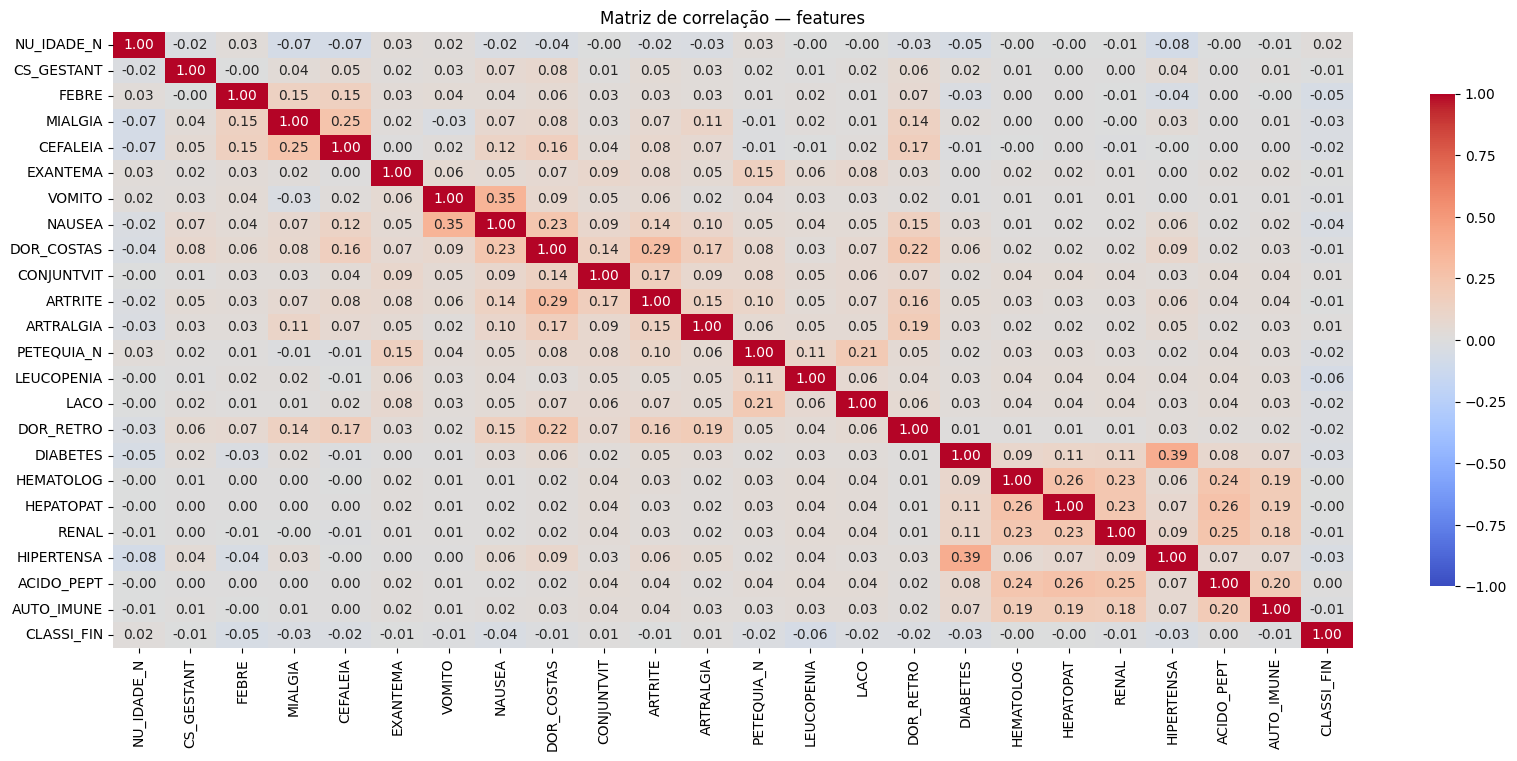

In [23]:
"""
A correlação entre as variáveis preditoras é baixa na maior parte dos casos, 
o que consideramos positivo pois reduz redundância e o risco de distorcer os resultados do modelo. 
Já em relação à variável alvo a qual selecionamos (CLASSI_FIN), não há correlação linear forte com nenhum sintoma isolado, 
reforçando que a gravidade da dengue depende da interação de múltiplos fatores clínicos e não de um único sintoma.

"""

# Correlação
plt.figure(figsize=(20,8))
df_numeric = drop.select_dtypes(include=['int64', 'float64'])
corr = df_numeric.corr()
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={"shrink": .8},annot=True, fmt=".2f")
plt.title("Matriz de correlação — features")
plt.show()